In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#loading data
path="../../Data/Boston.csv"
boston=pd.read_csv(path)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Simple Linear Regression

Regressing $medv$ (median house value) onto $lstat$ (percentage of households with low socioeconomic status).

In [5]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(boston["lstat"].to_numpy().reshape(-1, 1),boston["medv"].to_numpy().reshape(-1, 1))
print("Intercept:\t"+ str(lr.intercept_) + "\nCoefficient:\t" + str(lr.coef_))

Intercept:	[34.55384088]
Coefficient:	[[-0.95004935]]


In [6]:
import statsmodels.formula.api as smf

model=smf.ols("medv ~ lstat", data=boston)

print("Degrees of freedom for the model:\t"+str(model.df_model))
print("Degrees of freedom for residual:\t"+str(model.df_resid))
print("Y:\t"+str(model.endog_names))
print("X:\t"+str(model.exog_names))

Degrees of freedom for the model:	1.0
Degrees of freedom for residual:	504.0
Y:	medv
X:	['Intercept', 'lstat']


In [7]:
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           5.08e-88
Time:                        17:25:29   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

The p-values for both the Intercept and predictor are negligible and hence $lstat$ is statistically significant.

In [8]:
#getting the 95% confidence interval
print(result.conf_int(0.05))

                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


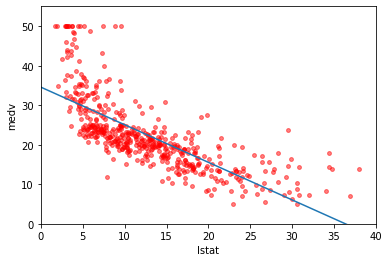

In [9]:
import statsmodels.graphics.api as smg

#plot OLS fitting results
fig, ax = plt.subplots()
plt.scatter(boston["lstat"], boston["medv"], color='r', s=15, alpha=0.5)  # Data points
smg.abline_plot(model_results=result, ax=ax)   # Regression line

plt.xlim(0, 40)
plt.ylim(0, 55)
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

There seems to be a slightly non-linear relationship between $medv$ and $lstat$.

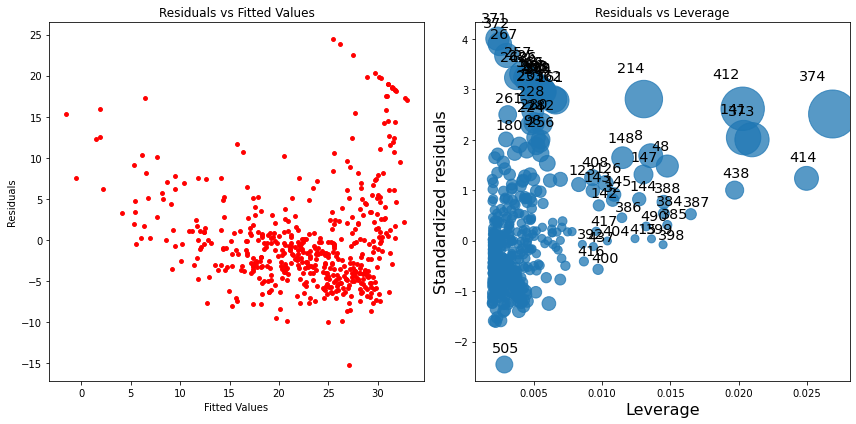

In [10]:
#diagnostic plots
fig, ax = plt.subplots(1,2,figsize=(12,6))

#Residuals vs Fitted Values
ax1=plt.subplot(121)
plt.scatter(result.fittedvalues, result.resid, color='r', s=15)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")

#Leverage Plot
ax2=plt.subplot(122)
smg.influence_plot(result,ax=ax2)
plt.xlabel("Leverage")
plt.ylabel("Standardized residuals")
plt.title("Residuals vs Leverage")

plt.tight_layout()
plt.show()

Due to the non linear spread of data in the plot of Residuals vs Fitted Values, a non linear relationship between $medv$ and $lstat$ can be assumed.

### Multiple Linear Regression

Regressing $medv$ onto $lstat$ and $age$.

In [11]:
X=boston[["lstat","age"]]
Y=boston["medv"]
lr.fit(X,Y)
print("Intercept:\t"+ str(lr.intercept_) + "\nCoefficient:\t" + str(lr.coef_))

Intercept:	33.2227605317929
Coefficient:	[-1.03206856  0.03454434]


In [12]:
model=smf.ols("medv ~ lstat + age", data=boston)

print("Degrees of freedom for the model:\t"+str(model.df_model))
print("Degrees of freedom for residual:\t"+str(model.df_resid))
print("Y:\t"+str(model.endog_names))
print("X:\t"+str(model.exog_names))

Degrees of freedom for the model:	2.0
Degrees of freedom for residual:	503.0
Y:	medv
X:	['Intercept', 'lstat', 'age']


In [13]:
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           2.98e-88
Time:                        17:25:33   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

The p-values for the Intercept and predictors are negligible and hence $lstat$ and $age$ are statistically significant.

Regressing $medv$ on all the predictors.

In [14]:
X=boston.drop("medv",axis=1)
Y=boston["medv"]
lr.fit(X,Y)
print("Intercept:\t"+ str(lr.intercept_) + "\nCoefficient:\t" + str(lr.coef_))

Intercept:	36.459488385090005
Coefficient:	[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [15]:
model=smf.ols("medv~" + "+".join(boston.columns.drop("medv")),data=boston)

print("Degrees of freedom for the model:\t"+str(model.df_model))
print("Degrees of freedom for residual:\t"+str(model.df_resid))
print("Y:\t"+str(model.endog_names))
print("X:\t"+str(model.exog_names))

Degrees of freedom for the model:	13.0
Degrees of freedom for residual:	492.0
Y:	medv
X:	['Intercept', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']


In [16]:
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          6.72e-135
Time:                        17:25:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

The p-values of $indus$ and $age$ are very high, and thus suggests statistical insignificance.

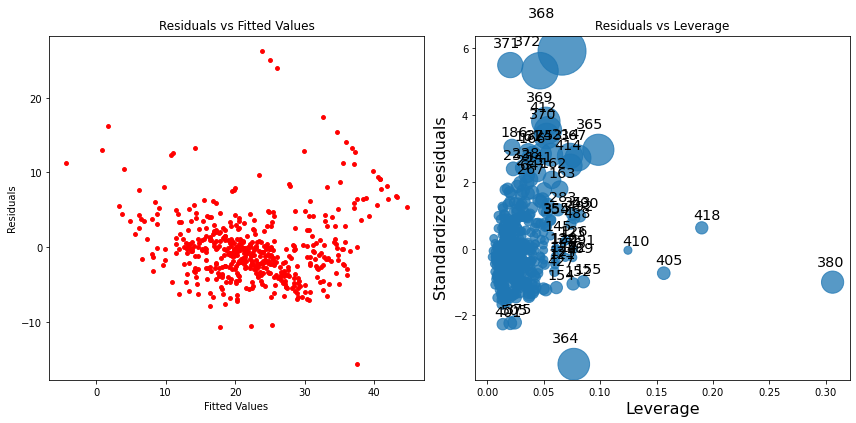

In [17]:
#diagnostic plots
fig, ax = plt.subplots(1,2,figsize=(12,6))

#Residuals vs Fitted Values
ax1=plt.subplot(121)
plt.scatter(result.fittedvalues, result.resid, color='r', s=15)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")

#Leverage Plot
ax2=plt.subplot(122)
smg.influence_plot(result,ax=ax2)
plt.xlabel("Leverage")
plt.ylabel("Standardized residuals")
plt.title("Residuals vs Leverage")

plt.tight_layout()
plt.show()

### Interaction Terms

Regressing $medv$ onto $lstat * age$.

In [18]:
boston["interaction"]=np.multiply(boston["lstat"],boston["age"])
X=boston[["lstat","age","interaction"]]
Y=boston["medv"]
lr.fit(X,Y)
print("Intercept:\t"+ str(lr.intercept_) + "\nCoefficient:\t" + str(lr.coef_))

Intercept:	36.088535934612906
Coefficient:	[-1.39211684e+00 -7.20859509e-04  4.15595185e-03]


In [19]:
model=smf.ols("medv ~ lstat * age", data=boston)

print("Degrees of freedom for the model:\t"+str(model.df_model))
print("Degrees of freedom for residual:\t"+str(model.df_resid))
print("Y:\t"+str(model.endog_names))
print("X:\t"+str(model.exog_names))

Degrees of freedom for the model:	3.0
Degrees of freedom for residual:	502.0
Y:	medv
X:	['Intercept', 'lstat', 'age', 'lstat:age']


In [20]:
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           4.86e-88
Time:                        17:25:35   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

### Non-Linear transformations of Predictors

Regressing $medv$ onto $lstat$ and $lstat^{2}$.

In [21]:
boston["quadratic"]=np.multiply(boston["lstat"],boston["lstat"])
X=boston[["lstat","quadratic"]]
Y=boston["medv"]
lr.fit(X,Y)
print("Intercept:\t"+ str(lr.intercept_) + "\nCoefficient:\t" + str(lr.coef_))

Intercept:	42.862007328169355
Coefficient:	[-2.3328211   0.04354689]


In [22]:
model=smf.ols("medv ~ lstat + I(lstat**2)",data=boston)

print("Degrees of freedom for the model:\t"+str(model.df_model))
print("Degrees of freedom for residual:\t"+str(model.df_resid))
print("Y:\t"+str(model.endog_names))
print("X:\t"+str(model.exog_names))

Degrees of freedom for the model:	2.0
Degrees of freedom for residual:	503.0
Y:	medv
X:	['Intercept', 'lstat', 'I(lstat ** 2)']


In [23]:
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          1.56e-112
Time:                        17:25:36   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

The negligible p-value for the quadratic term shows that the quadratic term is statistically significant.

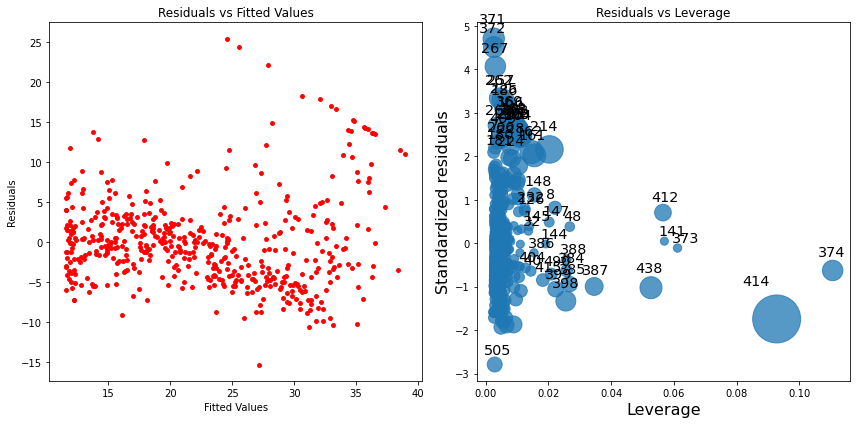

In [24]:
#diagnostic plots
fig, ax = plt.subplots(1,2,figsize=(12,6))

#Residuals vs Fitted Values
ax1=plt.subplot(121)
plt.scatter(result.fittedvalues, result.resid, color='r', s=15)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")

#Leverage Plot
ax2=plt.subplot(122)
smg.influence_plot(result,ax=ax2)
plt.xlabel("Leverage")
plt.ylabel("Standardized residuals")
plt.title("Residuals vs Leverage")

plt.tight_layout()
plt.show()

### Qualitative Predictors

In [25]:
#loading data
path="../../Data/Carseats.csv"
carseats=pd.read_csv(path)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [26]:
carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [27]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Regressing $Sales$ onto all predictors plus $Income * Advertising$ and $Price * Age$.

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

carseats["interaction1"]=np.multiply(carseats["Income"],carseats["Advertising"])
carseats["interaction2"]=np.multiply(carseats["Price"],carseats["Age"])

#categorical pipeline to process data
categorical_pipeline=Pipeline([("categorical_encoding",OneHotEncoder())])
categorical_columns=["ShelveLoc","Urban","US"]

#numerical pipeline to process data
numerical_pipeline=Pipeline([("numerical_imputer",SimpleImputer(strategy="mean"))])
numerical_columns=carseats.drop(["Sales","ShelveLoc","Urban","US"],axis=1).columns

#using the column transformer to prepare data
transformation=ColumnTransformer([("numerical_transformation",numerical_pipeline,numerical_columns),
                                  ("categorical_transformation",categorical_pipeline,categorical_columns)])
X=transformation.fit_transform(carseats.drop(["Sales"],axis=1))
Y=carseats["Sales"]
lr.fit(X,Y)
print("Intercept:\t"+ str(lr.intercept_) + "\nCoefficient:\t" + str(lr.coef_))

Intercept:	8.834179463116362
Coefficient:	[ 9.29371187e-02  1.08939611e-02  7.02462284e-02  1.59245307e-04
 -1.00806358e-01 -5.79465902e-02 -2.08524907e-02  7.51039210e-04
  1.06759850e-04 -2.26731273e+00  2.58136347e+00 -3.14050739e-01
 -7.00798618e-02  7.00798618e-02  7.87785716e-02 -7.87785716e-02]


In [29]:
model=smf.ols("Sales~" + "+".join(carseats.drop(["Sales","interaction1","interaction2"],axis=1).columns)+"+Income*Advertising + Price*Age",data=carseats)

print("Degrees of freedom for the model:\t"+str(model.df_model))
print("Degrees of freedom for residual:\t"+str(model.df_resid))
print("Y:\t"+str(model.endog_names))
print("X:\t"+str(model.exog_names))

Degrees of freedom for the model:	13.0
Degrees of freedom for residual:	386.0
Y:	Sales
X:	['Intercept', 'ShelveLoc[T.Good]', 'ShelveLoc[T.Medium]', 'Urban[T.Yes]', 'US[T.Yes]', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Income:Advertising', 'Price:Age']


In [30]:
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          6.14e-166
Time:                        17:25:38   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756    